In [7]:
import sys
from pathlib import Path

# Add the project directory to the Python path
project_dir = Path.cwd().parent
sys.path.append(str(project_dir))

from data import Data
from cnn import CNN
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('configuration_search_results.pkl', 'rb') as file:
    configuration_search_results = pickle.load(file)

In [10]:
configuration_search_results_dicts = [
    {'architecture': str(result[0]),
     'hidden_activation': result[1],
     'split': f'({result[2]['train']}, {result[2]['val']}, {result[2]['test']})',
     'val_accuracy': result[3],
     'test_accuracy': result[4]}
for result in configuration_search_results]

df = pd.DataFrame(configuration_search_results_dicts)
df

,architecture,hidden_activation,split,val_accuracy,test_accuracy
0,[128],relu,"(80, 10, 10)",0.645513,0.592166
1,[128],relu,"(40, 20, 40)",0.604808,0.564140
2,"[32, 64, 128]",relu,"(80, 10, 10)",0.557051,0.532258
3,[128],relu,"(10, 10, 80)",0.521614,0.521407
4,"[32, 64, 128]",relu,"(40, 20, 40)",0.573077,0.495244
5,"[32, 64, 128]",relu,"(10, 10, 80)",0.481268,0.434193
6,"[32, 64, 128]",sigmoid,"(40, 20, 40)",0.113462,0.101470
7,[128],sigmoid,"(80, 10, 10)",0.101923,0.095622
8,[128],sigmoid,"(10, 10, 80)",0.103746,0.092259
9,"[32, 64, 128]",sigmoid,"(10, 10, 80)",0.100865,0.092259


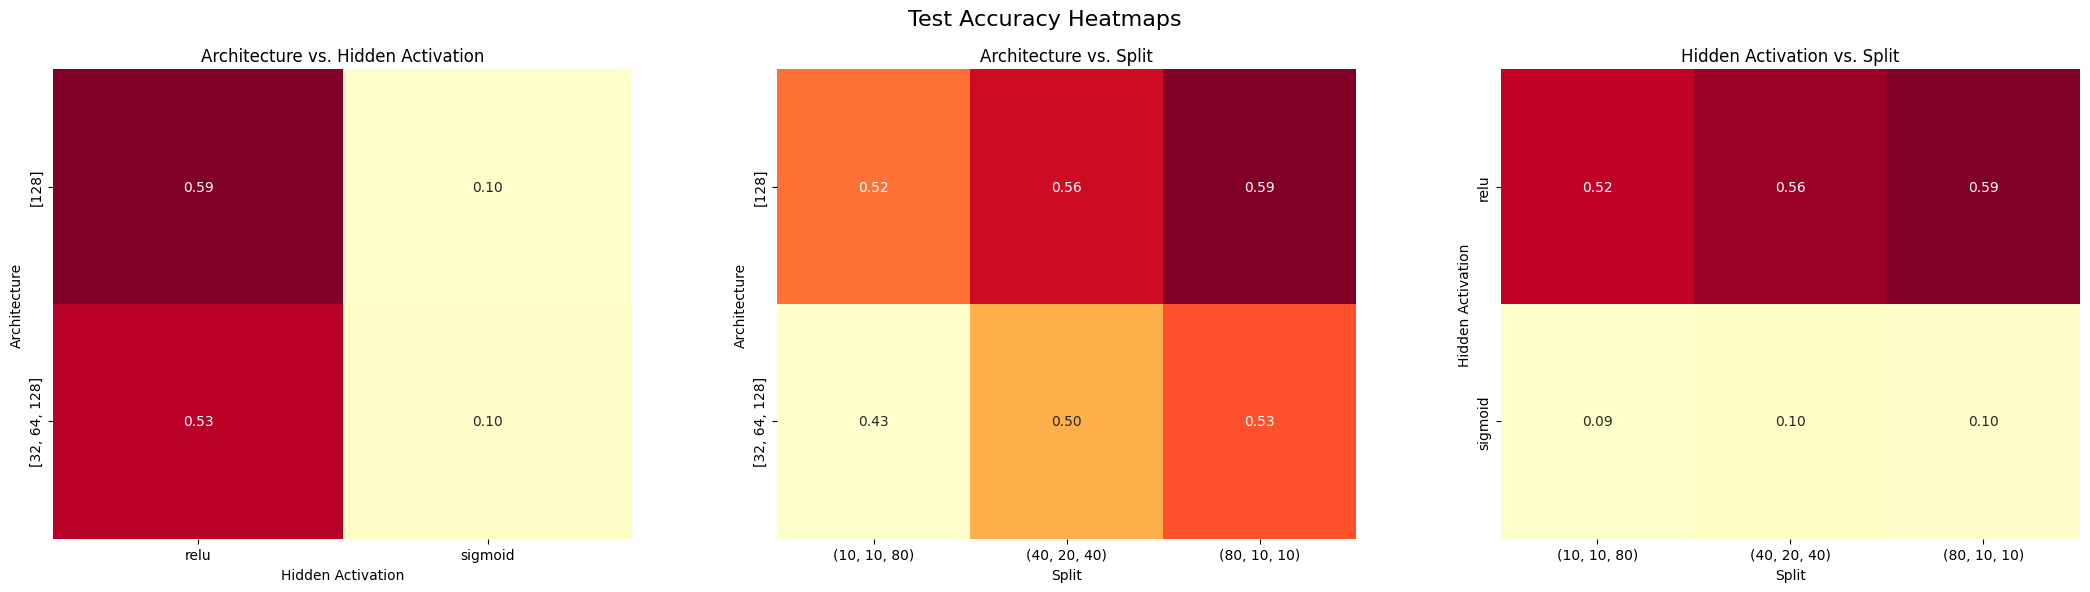

In [35]:
# Pivot tables for each pair of hyperparameters
pivot_arch_hidden = df.pivot_table(
    index='architecture', 
    columns='hidden_activation', 
    values='test_accuracy',
    aggfunc='max'
)

pivot_arch_split = df.pivot_table(
    index='architecture', 
    columns='split', 
    values='test_accuracy',
    aggfunc='max'
)

pivot_hidden_split = df.pivot_table(
    index='hidden_activation', 
    columns='split', 
    values='test_accuracy',
    aggfunc='max'
)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(21, 6))

# Heatmap 1: Architecture vs. Hidden Activation
sns.heatmap(pivot_arch_hidden, annot=True, fmt=".2f", cmap="YlOrRd", ax=axes[0], cbar=False)
axes[0].set_title("Architecture vs. Hidden Activation")
axes[0].set_xlabel("Hidden Activation")
axes[0].set_ylabel("Architecture")

# Heatmap 2: Architecture vs. Split
sns.heatmap(pivot_arch_split, annot=True, fmt=".2f", cmap="YlOrRd", ax=axes[1], cbar=False)
axes[1].set_title("Architecture vs. Split")
axes[1].set_xlabel("Split")
axes[1].set_ylabel("Architecture")

# Heatmap 3: Hidden Activation vs. Split
sns.heatmap(pivot_hidden_split, annot=True, fmt=".2f", cmap="YlOrRd", ax=axes[2], cbar=False)
axes[2].set_title("Hidden Activation vs. Split")
axes[2].set_xlabel("Split")
axes[2].set_ylabel("Hidden Activation")

# Display the figure
plt.suptitle("Test Accuracy Heatmaps", fontsize=16)
plt.tight_layout()
fig.subplots_adjust(wspace=0.25)

plt.savefig("heatmaps.png")
plt.show()
